In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import squarify
import time
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
df_Nov = pd.read_csv("./data/2019-Nov.csv")

In [18]:
sample = df_Nov.sample(n=100000, random_state=42)

In [4]:
# Since we are often interested in the purchases, let's isolate this one

purchases = df_Nov.loc[df_Nov.event_type == 'purchase']

In [19]:
sample['event_time'] = pd.to_datetime(sample['event_time'])

## Question [RQ3]
For each category, what’s the brand whose prices are higher on average?

### 3.a
Write a function that asks the user a category in input and returns a plot indicating the average price of the products sold by the brand.

In [5]:
def avg_price_cat(df, category):
    
    # Compute the average prices
    avg_prices = purchases.loc[purchases['category_id'] == category].groupby('brand').mean()['price']
    
    # Plot them
    f = plt.figure()
    ax = avg_prices.plot(figsize=(15,6), kind='bar', color = "royalblue", zorder=3)

    # Set up grids
    plt.grid(color = 'lightgray', linestyle='-.', zorder = 0)

    # setting label for x, y and the title
    plt.setp(ax,xlabel='brands', ylabel='avg price',
             title = 'Average price for brand')
    
    plt.show()
    
    return

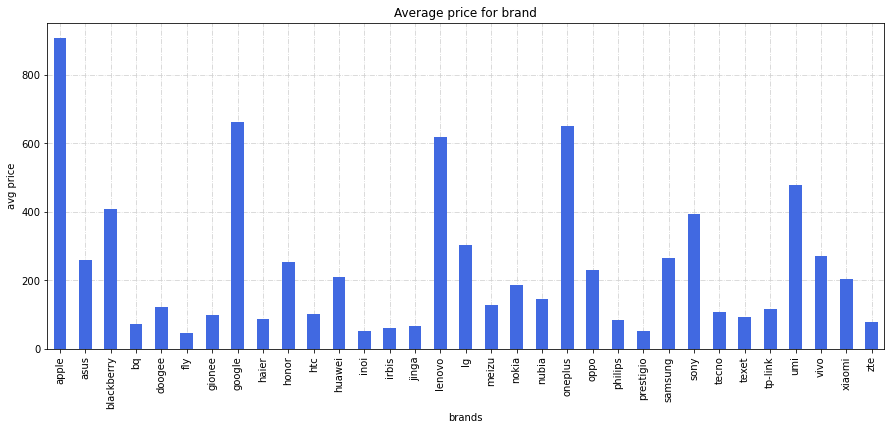

In [6]:
avg_price_cat(df_Nov, 2053013555631882655)

### 3.b
Find, for each category, the brand with the highest average price. Return all the results in ascending order by price.

In [51]:
purchases_with_brands = purchases.loc[purchases.brand.notnull()]

In [66]:
test = purchases_with_brands.groupby(['category_id','brand']).mean().reset_index()
test

,category_id,brand,product_id,price,user_id
0,2053013552226107603,elenberg,8.600038e+06,9.453636,5.369219e+08
1,2053013552226107603,polaris,8.600149e+06,32.732500,5.371250e+08
2,2053013552226107603,scarlett,8.600233e+06,25.710000,5.499489e+08
3,2053013552226107603,willmark,8.600175e+06,15.218571,5.306813e+08
4,2053013552259662037,amos,8.500411e+06,286.252500,5.395522e+08
...,...,...,...,...,...
5664,2180736592824501056,realflame,1.000137e+08,488.820000,5.775544e+08
5665,2181922917904810326,dwt,1.000220e+08,19.870000,5.129804e+08
5666,2181922923097358794,paiste,1.000201e+08,141.570000,5.184566e+08
5667,2185524688778691138,clatronic,1.000270e+08,46.310000,5.789251e+08


In [108]:
df_max = df.groupby('id').idxmax()
df_max['type'] = 'max'
df_min = df.groupby('id').idxmin()
df_min['type'] = 'min'

df2 = df_max.append(df_min).set_index('type',append=True).stack().rename('index')

df3 = pd.concat([ df2.reset_index().drop('id',axis=1).set_index('index'), 
                  df.loc[df2.values] ], axis=1 )

df3.set_index(['id','level_2','type']).sort_index()

,product_id,price,user_id
category_id,,,
2053013552226107603,2,1,2
2053013552259662037,9,18,15
2053013552293216471,34,62,54
2053013552326770905,73,72,72
2053013552351936731,99,87,95
...,...,...,...
2180736592824501056,5664,5664,5664
2181922917904810326,5665,5665,5665
2181922923097358794,5666,5666,5666


In [104]:
test.loc[test['price'].isin(values)]

,category_id,brand,product_id,price,user_id
1,2053013552226107603,polaris,8.600149e+06,32.732500,5.371250e+08
2,2053013552226107603,scarlett,8.600233e+06,25.710000,5.499489e+08
16,2053013552259662037,protherm,8.500120e+06,514.560000,5.253495e+08
18,2053013552259662037,rinnai,8.500204e+06,857.159487,5.409379e+08
49,2053013552293216471,p.i.t.,6.200890e+06,25.740000,5.414153e+08
...,...,...,...,...,...
5664,2180736592824501056,realflame,1.000137e+08,488.820000,5.775544e+08
5665,2181922917904810326,dwt,1.000220e+08,19.870000,5.129804e+08
5666,2181922923097358794,paiste,1.000201e+08,141.570000,5.184566e+08
5667,2185524688778691138,clatronic,1.000270e+08,46.310000,5.789251e+08


## Question [RQ5]
In what part of the day is your store most visited? Knowing which days of the week or even which hours of the day shoppers are likely to visit your online store and make a purchase may help you improve your strategies. Create a plot that for each day of
the week show the hourly average of visitors your store has.

In [98]:
def avg_users(df):
    
    week_days = []
    
    for _, week_day_df in df.groupby([df.event_time.dt.weekday]):
        users_num = week_day_df.groupby([week_day_df.event_time.dt.hour]).count()['user_id']
        week_days.append((users_num, week_day_df.event_time.iloc[0].strftime('%A')))
        
    plots_colors = ['royalblue', 'orange', 'mediumseagreen', 
                    'crimson', 'darkcyan', 'coral', 'violet']
    
    
    # For every day of the week, plot the average number of users that visit the store each hour
    for i, (week_day, day_name) in enumerate(week_days):
        # Plot them
        f = plt.figure()
        ax = week_day.plot(figsize=(15,6), kind='bar', color = plots_colors[i], zorder=3)
        
        # Set up grids
        plt.grid(color = 'lightgray', linestyle='-.', zorder = 0)

        # setting label for x, y and the title
        plt.setp(ax,xlabel='hour', ylabel='avg users',
                 title = 'Average number of users per hour - {}'.format(day_name))

        plt.show()
    
    return

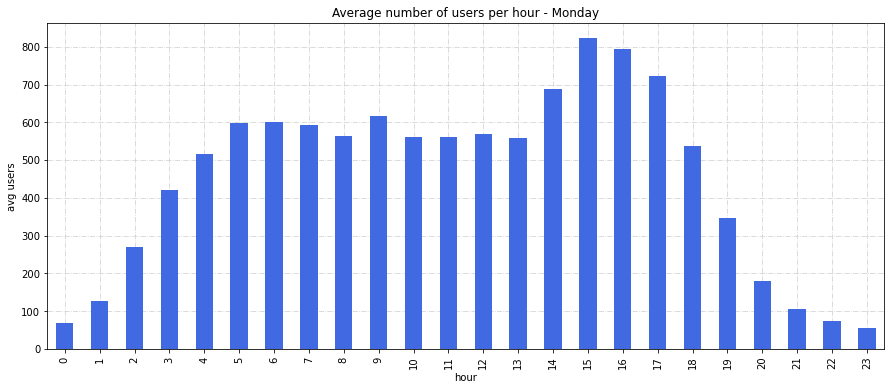

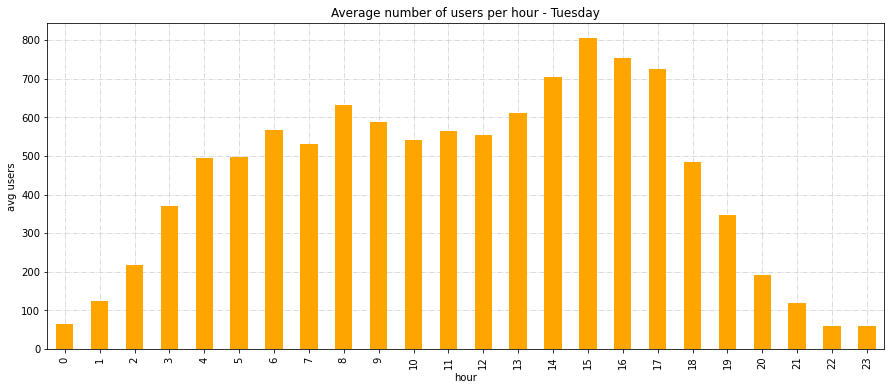

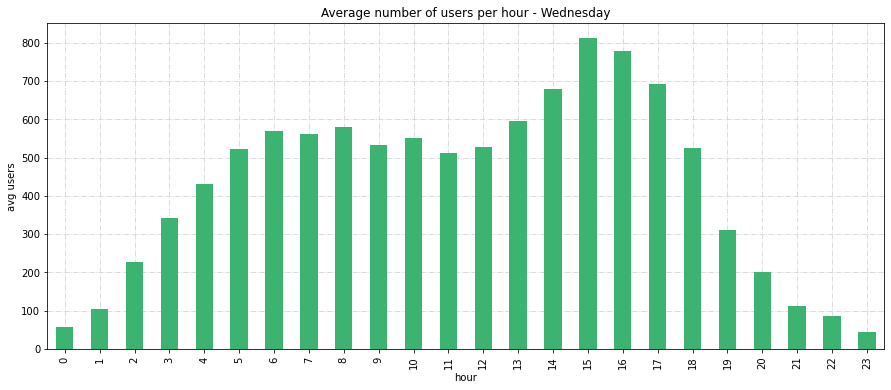

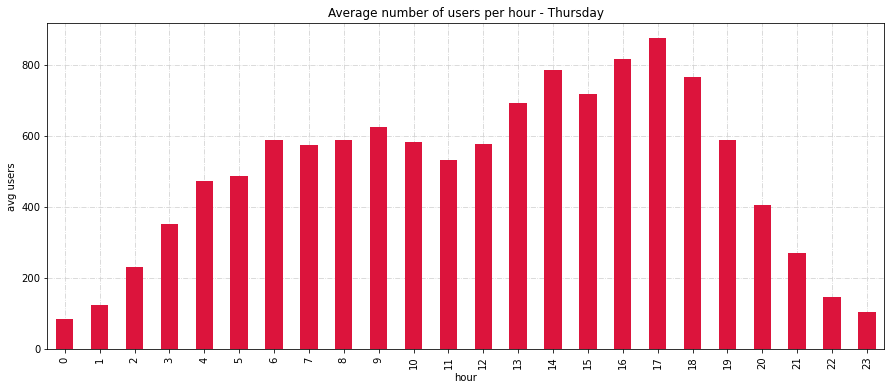

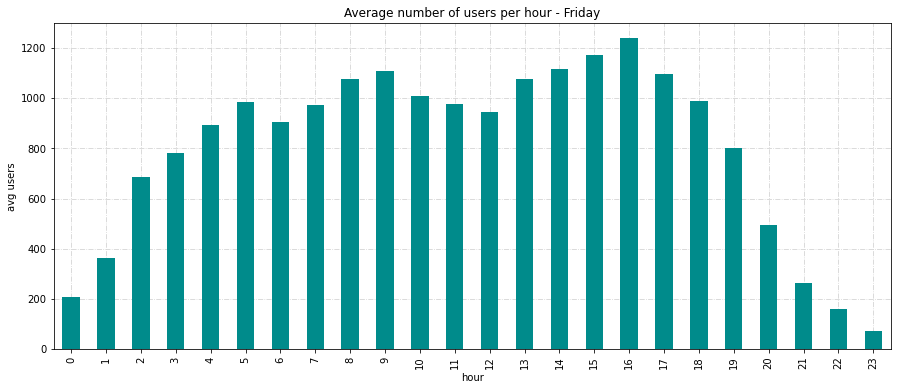

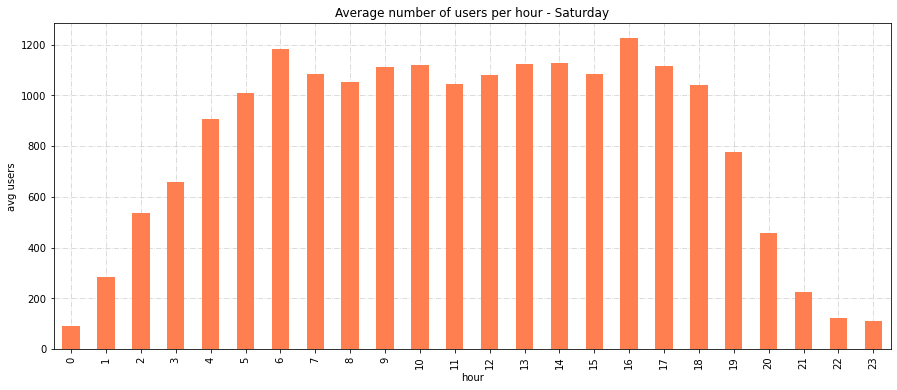

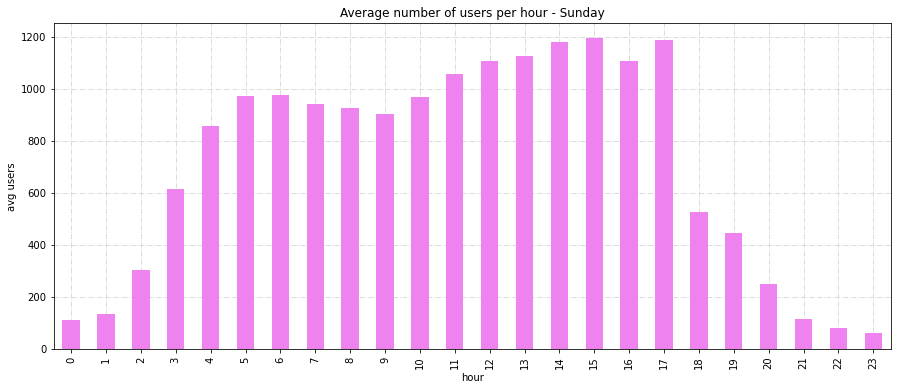

In [100]:
avg_users(sample)